In [186]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import os
import json

In [187]:
main_path = '../../../logs/pytorch_seed_rl/scaling_experiment'

In [188]:
subfolders_paths = [f.path for f in os.scandir(main_path) if f.is_dir()]

In [189]:
rows = []
for path in subfolders_paths:
    name = os.path.basename(path)
    csv_path = os.path.join(path, 'csv', 'system.csv')
    config_path = os.path.join(path, 'config.json')
    with open(config_path) as file:
        config = json.load(file)
    df = pd.read_csv(csv_path)
    last_row = df.iloc[-10][['runtime', 'inference_steps', 'training_steps']].copy()
    last_row['inference_sps'] = int(last_row['inference_steps'] / last_row['runtime'])
    last_row['training_sps'] = int(last_row['training_steps'] / last_row['runtime'])
    
    last_row = last_row[['runtime', 'inference_sps', 'training_sps']]
    
    last_row['actors'] = config['num_actors']
    last_row['envs'] = config['num_envs']
    last_row['prefetchers'] = config['num_prefetchers']
    last_row['inferencers'] = config['num_inference_threads']
    last_row['used_gpus'] = 1
    last_row['total_envs'] = config['num_actors']*config['num_envs']
    last_row['setup'] = '%s actors, %s envs, %s prefetchers, %s inferencers'%(str(int(last_row['actors'])).zfill(2), 
                                                              str(int(last_row['envs'])).zfill(2), 
                                                              str(int(last_row['prefetchers'])).zfill(1), 
                                                              str(int(last_row['inferencers'])).zfill(1))
    
    rows.append(last_row)
df = pd.DataFrame(rows)

In [190]:
df = df.sort_values('training_sps', ascending=False)

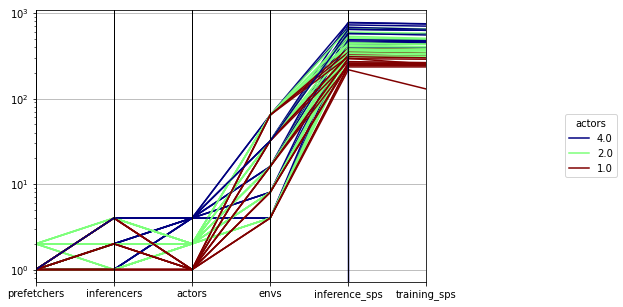

In [193]:
plt.figure(figsize=(7,5))
cmap = cm.get_cmap('jet') # Colour map (there are many others)
pd.plotting.parallel_coordinates(df, 'actors',
                                 	['prefetchers',
                                     'inferencers',
                                     'actors',
                                     'envs',
                                     'inference_sps',
                                     'training_sps'],
                                colormap=cmap)
plt.yscale('log') 
plt.legend(title='actors',
           loc='center right',
           bbox_to_anchor=(1.5, 0.5))
plt.savefig('scaling.pdf')

In [194]:
df.sort_values('training_sps', ascending=False)

,runtime,inference_sps,training_sps,actors,envs,prefetchers,inferencers,used_gpus,total_envs,setup
12370,132.119690,775.0,748.0,4.0,32.0,1.0,1.0,1.0,128.0,"04 actors, 32 envs, 1 prefetchers, 1 inferencers"
12370,133.380553,768.0,743.0,4.0,64.0,1.0,1.0,1.0,256.0,"04 actors, 64 envs, 1 prefetchers, 1 inferencers"
13231,141.274362,725.0,702.0,4.0,16.0,1.0,1.0,1.0,64.0,"04 actors, 16 envs, 1 prefetchers, 1 inferencers"
14263,151.503971,676.0,652.0,2.0,64.0,1.0,1.0,1.0,128.0,"02 actors, 64 envs, 1 prefetchers, 1 inferencers"
13929,154.362847,680.0,644.0,4.0,64.0,1.0,2.0,1.0,256.0,"04 actors, 64 envs, 1 prefetchers, 2 inferencers"
14951,158.554190,649.0,627.0,2.0,64.0,2.0,1.0,1.0,128.0,"02 actors, 64 envs, 2 prefetchers, 1 inferencers"
15198,159.108272,642.0,627.0,4.0,8.0,1.0,1.0,1.0,32.0,"04 actors, 08 envs, 1 prefetchers, 1 inferencers"
14595,159.222068,646.0,627.0,4.0,32.0,1.0,2.0,1.0,128.0,"04 actors, 32 envs, 1 prefetchers, 2 inferencers"
16207,171.168818,598.0,579.0,2.0,32.0,2.0,1.0,1.0,64.0,"02 actors, 32 envs, 2 prefetchers, 1 inferencers"
16870,175.420577,573.0,569.0,4.0,4.0,1.0,1.0,1.0,16.0,"04 actors, 04 envs, 1 prefetchers, 1 inferencers"
